In [27]:
#Importing necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading the dataset

dt = pd.read_csv('dataScience_salaries.csv')

In [3]:
# Reading the dataset

dt.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
#Dropping the unnamed column as it is just for serial numbers

dt = dt.drop(['Unnamed: 0'], axis=1)

dt.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
#Shape of the dataset

dt.shape

(607, 11)

In [6]:
# Checking the null values

dt.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [8]:
# getting the list of unique values

dict = {}
for col in dt.columns:
    dict[col] = dt[col].value_counts().shape[0]

pd.DataFrame(dict, index=['unique value count']).transpose()

,unique value count
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3
company_location,50


In [9]:
dt.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


# Observations

Based on the above information following information can be drawn from it:

1. There are around 607 rows & 12 columns.
2. There are no Null values present in the dataset.
3. Majority of the columns are of categorical.
4. Unnamed columns has been removed as it for serial numbers only.
5. There are 50 Job_titles which seems alot, we'll be interested in the highest job_titles and same goes with the employee_residence and company_location.
6. We'll consider the salary in USD columns for comparison.

In [10]:
# Exploring job_title column and its value counts

dt['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [11]:
# Data Scientist

job = dt.job_title.str.contains('Data Scientist')
dt.loc[job, 'New_job_title'] = 'Data Scientist'

# Machine Learning Engineer

job = dt.job_title.str.contains('Machine Learning')
dt.loc[job, 'New_job_title'] = 'Machine Learning Engineer'

# Data Analyst

job = dt.job_title.str.contains('Data Analyst')
dt.loc[job, 'New_job_title'] = 'Data Analyst'

# Data Engineer

job = dt.job_title.str.contains('Data Engineer')
dt.loc[job, 'New_job_title'] = 'Data Engineer'

# Manager 

job = dt.job_title.str.contains('Manager')
dt.loc[job, 'New_job_title'] = 'Manager'

In [12]:
dt.New_job_title.isna().sum()

90

### There are a total of 90 null values present in the dataset. Hence, we will check which Job titles are not merged and then depending upon their titles those job titles would be merged as well.

In [13]:
data = dt[(dt.New_job_title != 'Data Scientist') & (dt.New_job_title != 
'Machine Learning Engineering') & (dt.New_job_title != 'Data Analyst') & (dt.New_job_title != 'Data Engineer') 
& (dt.New_job_title != 'Manager')]

In [14]:
data.job_title.value_counts()

Machine Learning Engineer                   41
Research Scientist                          16
Data Architect                              11
Machine Learning Scientist                   8
Data Science Consultant                      7
Director of Data Science                     7
AI Scientist                                 7
ML Engineer                                  6
Computer Vision Engineer                     6
Head of Data                                 5
Applied Machine Learning Scientist           4
Analytics Engineer                           4
Data Analytics Engineer                      4
Head of Data Science                         4
Data Science Engineer                        3
Machine Learning Developer                   3
Computer Vision Software Engineer            3
Machine Learning Infrastructure Engineer     3
ETL Developer                                2
Data Specialist                              1
3D Computer Vision Researcher                1
Big Data Arch

#### Now Merging these remaining titles with those 5 new job titles.

In [15]:
# Data Scientist 

job = dt.job_title.str.contains('Research Scientist')
dt.loc[job, 'New_job_title'] = 'Data Scientist'

job = dt.job_title.str.contains('Data Science Consultant')
dt.loc[job, 'New_job_title'] = 'Data Scientist'

job = dt.job_title.str.contains('AI Scientist')
dt.loc[job, 'New_job_title'] = 'Data Scientist'

# Machine Learning Engineer 

job = dt.job_title.str.contains('ML Engineer')
dt.loc[job, 'New_job_title'] = 'Machine Learning Engineer'

job = dt.job_title.str.contains('Computer Vision Engineer')
dt.loc[job, 'New_job_title'] = 'Machine Learning Engineer'

job = dt.job_title.str.contains('NLP Engineer')
dt.loc[job, 'New_job_title'] = 'Machine Learning Engineer'

# Data Engineer

job = dt.job_title.str.contains('Data Architect')
dt.loc[job, 'New_job_title'] = 'Data Engineer'

job = dt.job_title.str.contains('Data Science Engineer')
dt.loc[job, 'New_job_title'] = 'Data Engineer'

job = dt.job_title.str.contains('Data Analytics Engineer')
dt.loc[job, 'New_job_title'] = 'Data Engineer'

job = dt.job_title.str.contains('Big Data Architect')
dt.loc[job, 'New_job_title'] = 'Data Engineer'

# Data Analyst

job = dt.job_title.str.contains('Analytics Engineer')
dt.loc[job, 'New_job_title'] = 'Data Analyst'

# Manager

job = dt.job_title.str.contains('Lead')
dt.loc[job, 'New_job_title'] = 'Manager'

job = dt.job_title.str.contains('Head')
dt.loc[job, 'New_job_title'] = 'Manager'

job = dt.job_title.str.contains('Director')
dt.loc[job, 'New_job_title'] = 'Manager'

# Others

job = dt.job_title.str.contains('Computer Vision Software Engineer')
dt.loc[job, 'New_job_title'] = 'Others'

job = dt.job_title.str.contains('ETL Developer')
dt.loc[job, 'New_job_title'] = 'Others'

job = dt.job_title.str.contains('3D Computer Vision Researcher')
dt.loc[job, 'New_job_title'] = 'Others'

job = dt.job_title.str.contains('Data Specialist')
dt.loc[job, 'New_job_title'] = 'Others'


In [16]:
dt.New_job_title.isna().sum()

0

In [17]:
dt.employee_residence.value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

#### We can see a similar pattern in employee residence column where majority of the values have very less frequence hence,I'll change these values to others.

In [18]:
dt.loc[dt['employee_residence'].map(dt['employee_residence'].
value_counts(normalize=True).lt(0.03)), 'employee_residence'] = 'Others'

In [19]:
dt.employee_residence.value_counts()

US        332
Others    147
GB         44
IN         30
CA         29
DE         25
Name: employee_residence, dtype: int64

#### A similar pattern is observed in company location column as well and hence, I'll group the low frequency value into others.

In [20]:
dt.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

In [21]:
dt.loc[dt['company_location'].map(dt['company_location'].value_counts(normalize=True).lt(0.025)),
      'company_location'] = 'Others'

In [22]:
dt.company_location.value_counts()

US        355
Others    123
GB         47
CA         30
DE         28
IN         24
Name: company_location, dtype: int64

In [23]:
dt.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence      6
remote_ratio            3
company_location        6
company_size            3
New_job_title           6
dtype: int64

In [24]:
# Dropping the job_title column

dt = dt.drop(['job_title'], axis=1)

In [25]:
dt

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,New_job_title
0,2020,MI,FT,70000,EUR,79833,DE,0,DE,L,Data Scientist
1,2020,SE,FT,260000,USD,260000,Others,0,Others,S,Machine Learning Engineer
2,2020,SE,FT,85000,GBP,109024,GB,50,GB,M,Data Engineer
3,2020,MI,FT,20000,USD,20000,Others,0,Others,S,Data Analyst
4,2020,SE,FT,150000,USD,150000,US,50,US,L,Machine Learning Engineer
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,154000,USD,154000,US,100,US,M,Data Engineer
603,2022,SE,FT,126000,USD,126000,US,100,US,M,Data Engineer
604,2022,SE,FT,129000,USD,129000,US,0,US,M,Data Analyst
605,2022,SE,FT,150000,USD,150000,US,100,US,M,Data Analyst


E:\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda3\envs\myenv\lib\site-p

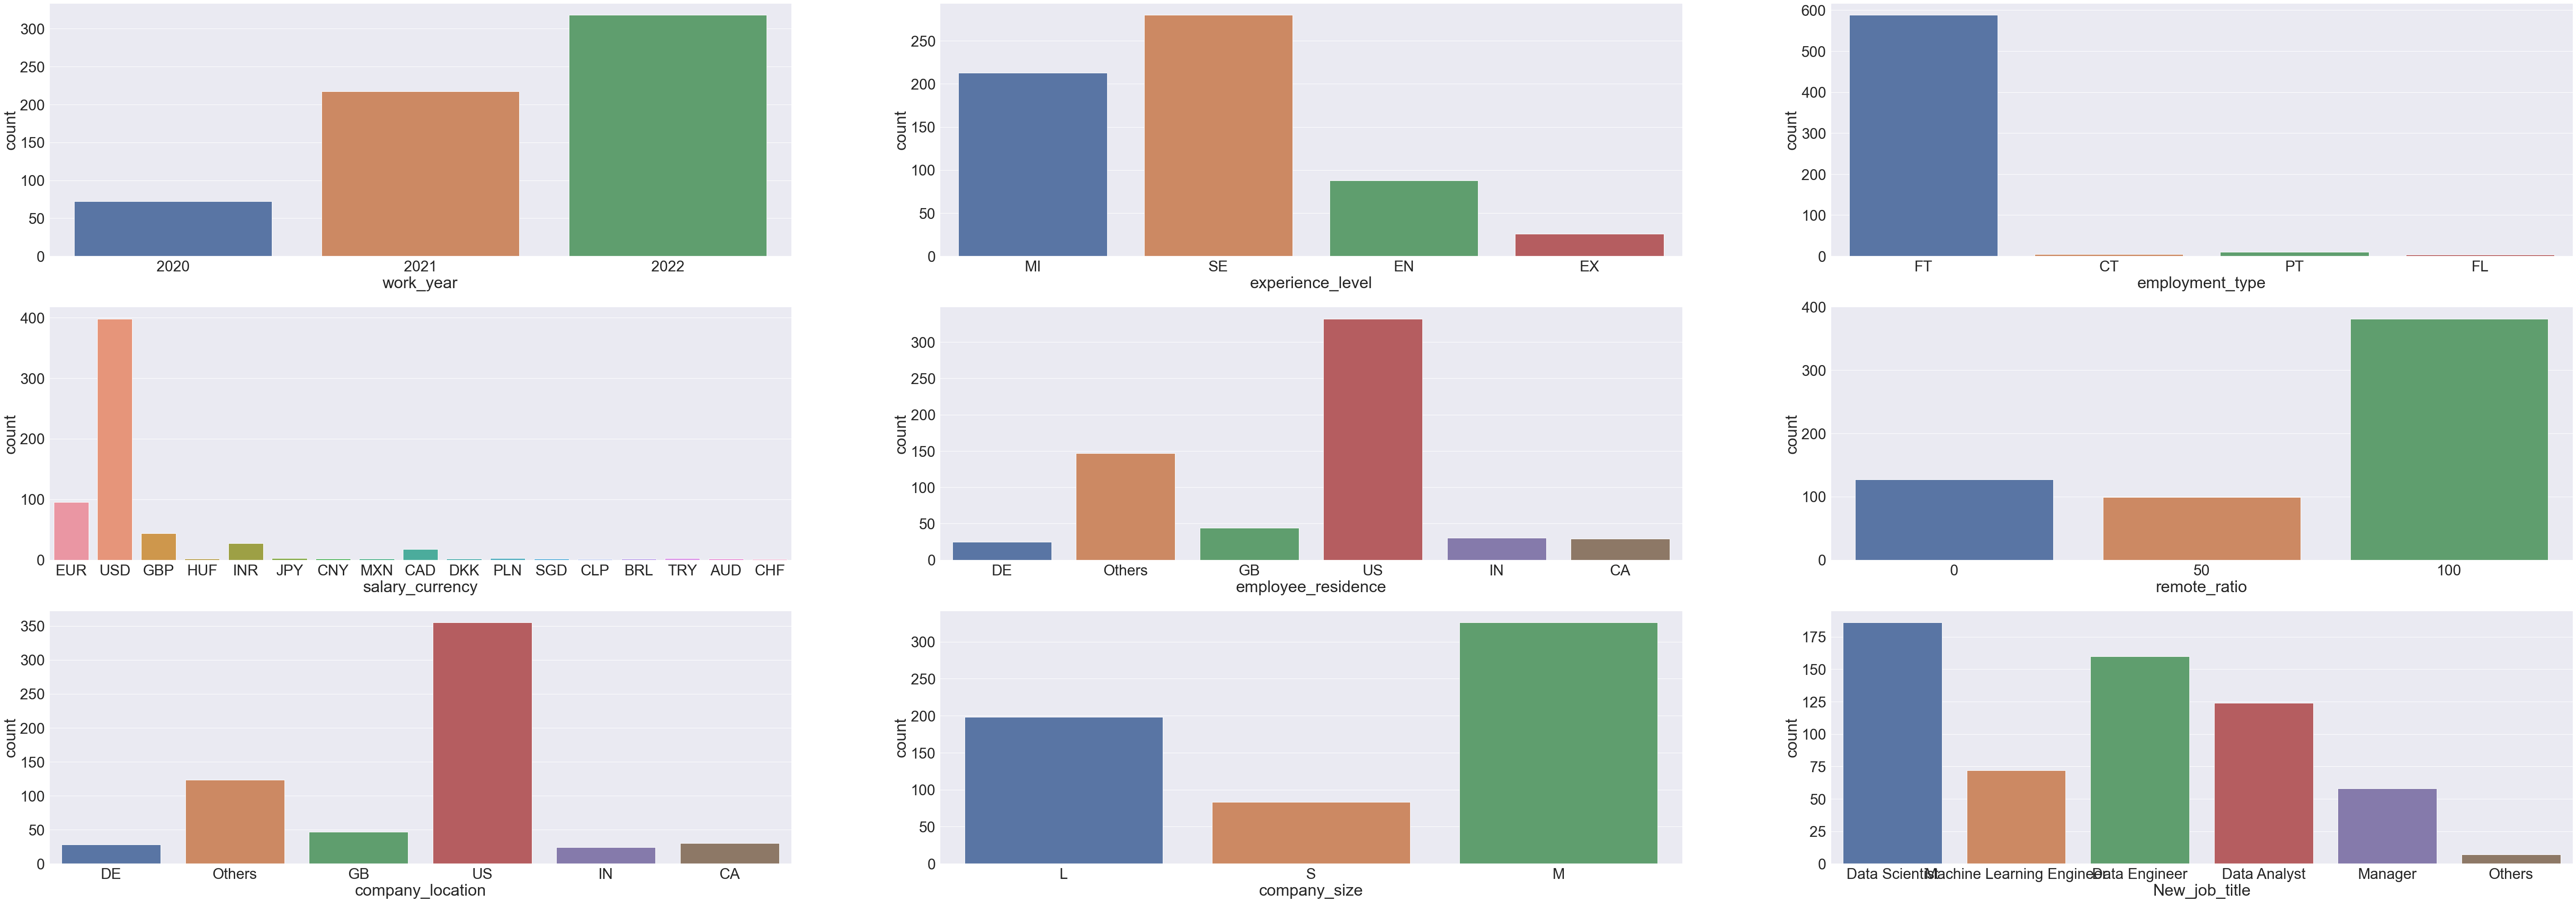

In [39]:
sns.set(rc={'figure.figsize':(100,35)}, font_scale = 3.0)
fig, ax = plt.subplots(3,3)
sns.countplot(dt['work_year'], ax=ax[0,0])
sns.countplot(dt['experience_level'], ax=ax[0,1])
sns.countplot(dt['employment_type'], ax=ax[0,2])
sns.countplot(dt['salary_currency'], ax=ax[1,0])
sns.countplot(dt['employee_residence'], ax=ax[1,1])
sns.countplot(dt['remote_ratio'], ax=ax[1,2])
sns.countplot(dt['company_location'], ax=ax[2,0])
sns.countplot(dt['company_size'], ax=ax[2,1])
sns.countplot(dt['New_job_title'], ax=ax[2,2])
fig.show()


<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

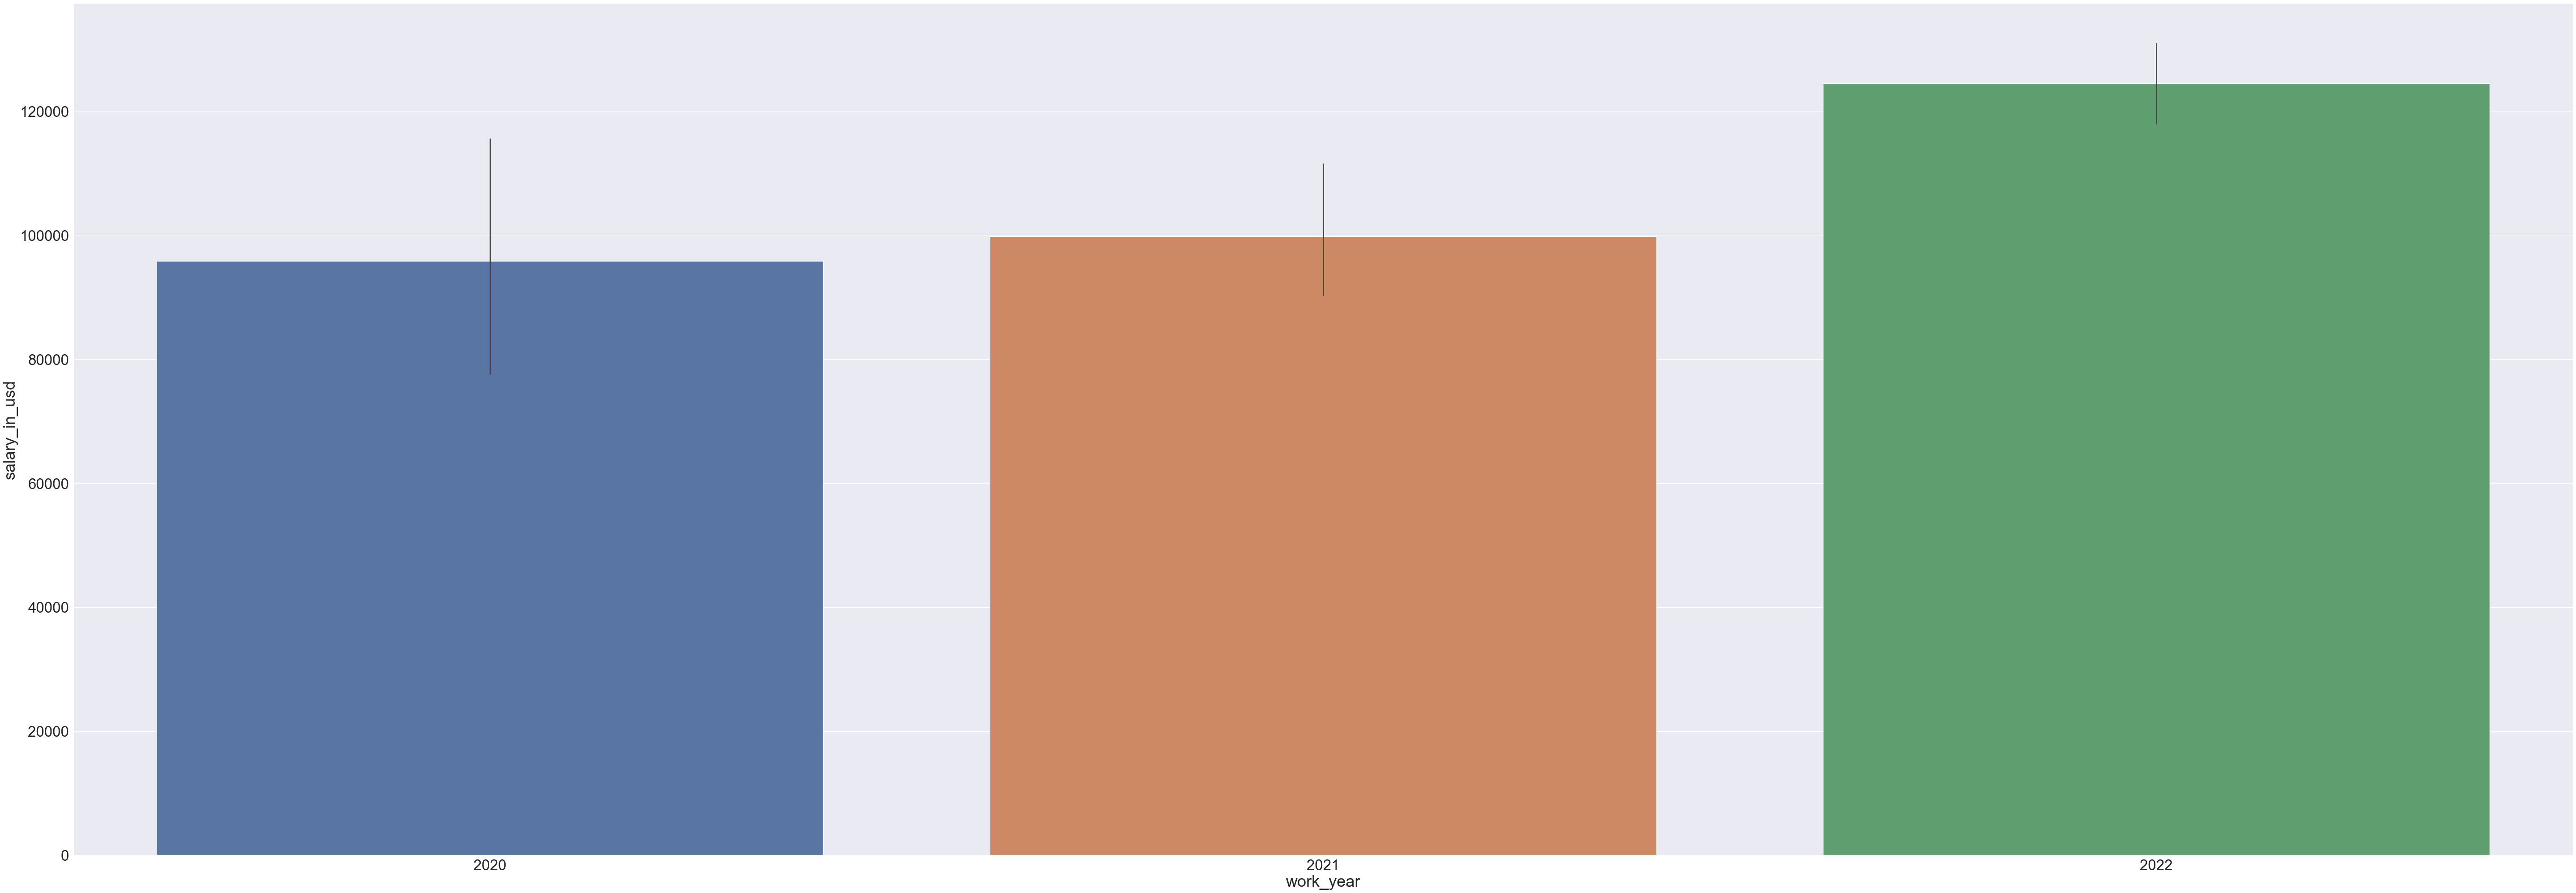

In [57]:
sns.barplot(x = dt['work_year'], y = dt['salary_in_usd'])

### Observation

#### 1. Majority of the salaries were paid in recent years i.e. 2022 compared to previous years.

#### 2. Almost all of the employee are full time employees indicating it is difficult to get a part-time job in data science domian.

#### 3. Majority of the companies are Medium Sized companies.

#### 4. Looks like most of the companies are flexible as most of them have high remote ratio

#### 5. Most of the employees resides in US which conincides with the fact that most of the companies are of US 

## Questions
### Some questions/relations that would be intresting to look at
##### 1. Which comapny size is giving high remote ratio ?
##### 2. What's the relation between salary and experience ?
##### 3. What's the relation between salary and job title ?
##### 4. Is there any relation between company location and experience level ?
##### 5. Relation between salary and employee residence ?
##### 6. Relation between remote ratio and experience level ?
##### 7. Relation between salary and company size ?

<AxesSubplot:xlabel='remote_ratio', ylabel='count'>

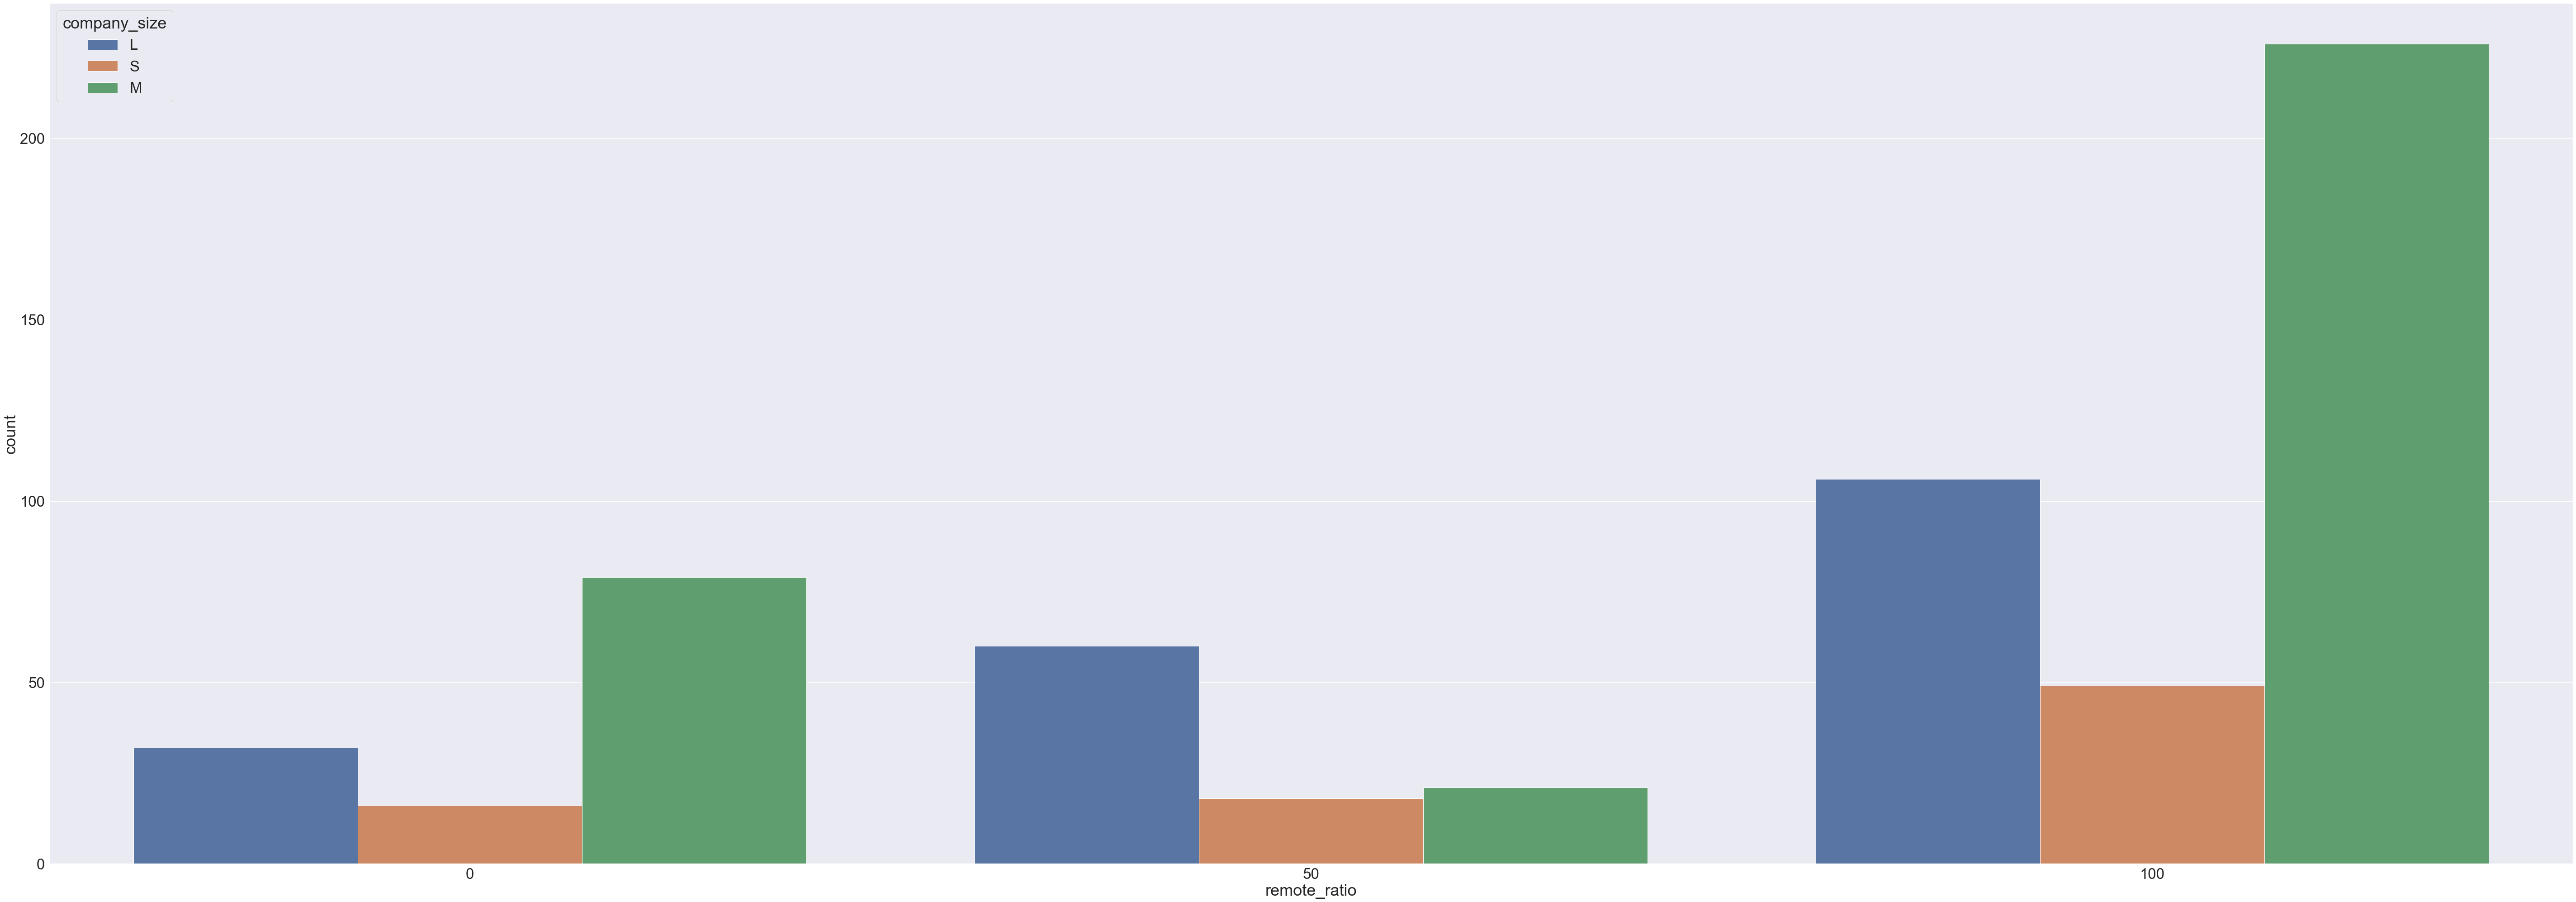

In [58]:
sns.countplot(x = 'remote_ratio', hue = 'company_size', data = dt)

#### 1. Large size companies prefer to have hybrid working mode as their ratio is highest in partial remote category.
#### 2. Medium size companies are more flexible  as most of them allow work from home/remote working.

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

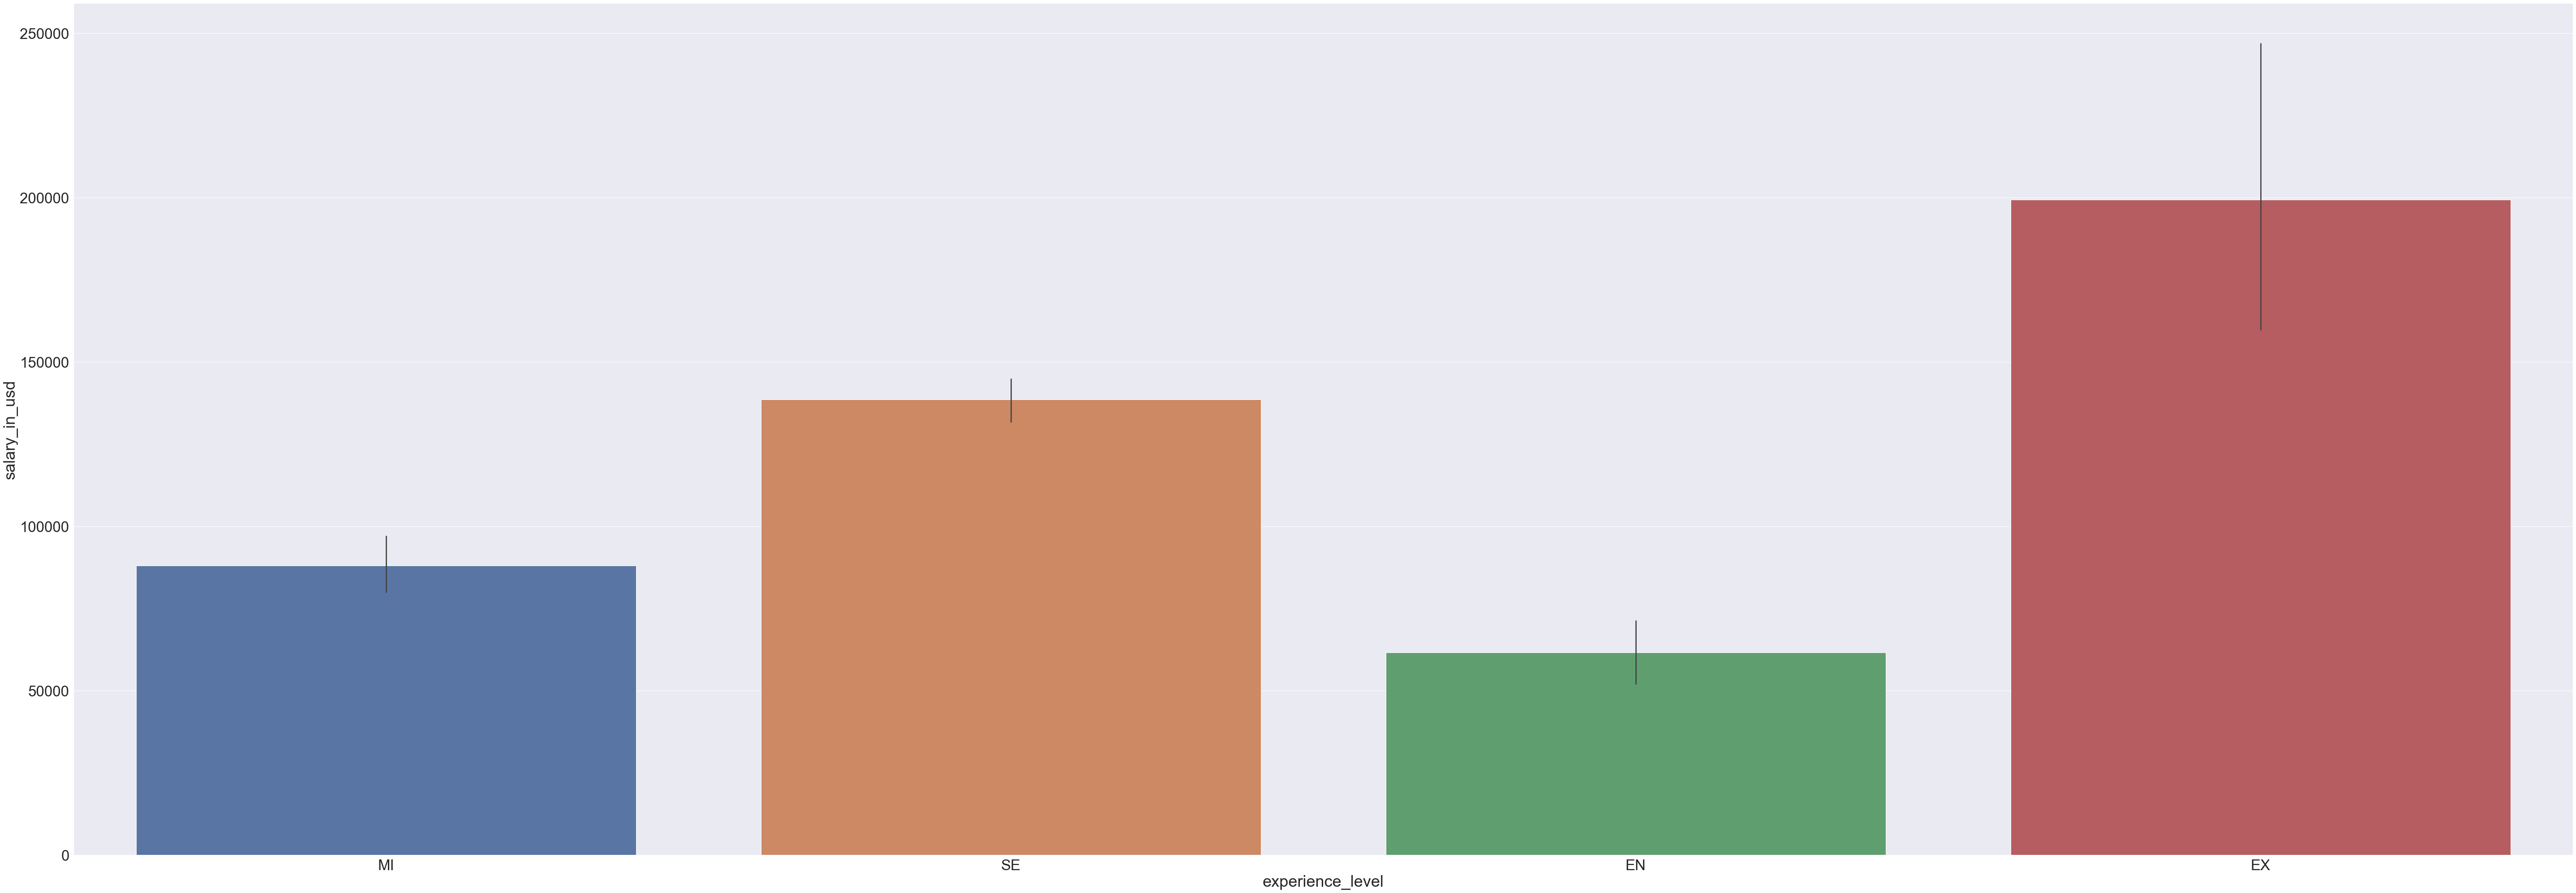

In [60]:
sns.barplot( x = 'experience_level', y = 'salary_in_usd', data = dt)

### 1. In Executive level there are more variations in salary than others.

<AxesSubplot:xlabel='New_job_title', ylabel='salary_in_usd'>

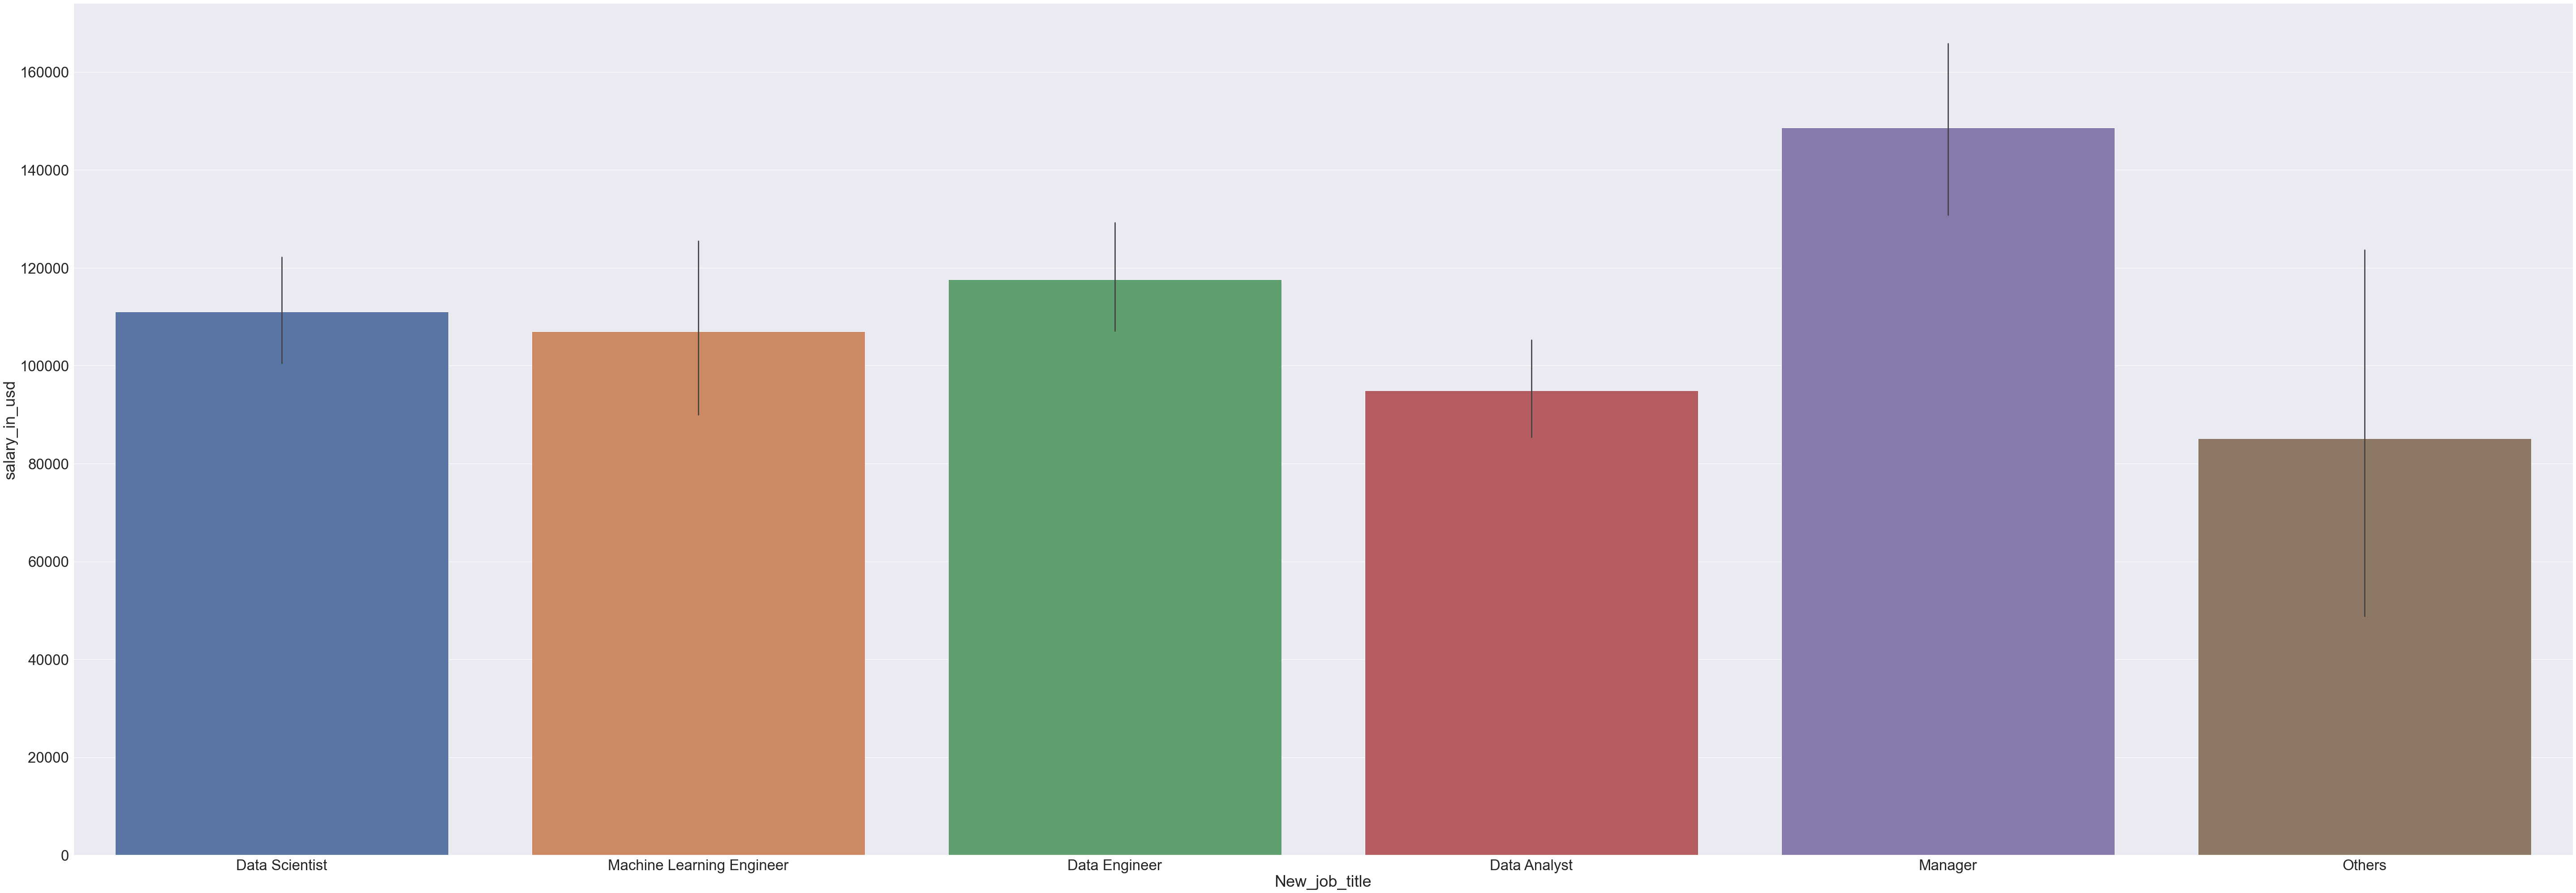

In [80]:
sns.barplot(x = dt['New_job_title'], y = dt['salary_in_usd'])

### 1.Managers are earning more compared to other roles which is expected.
### 2. It is intresting to note that Data Engineers are earning a bit more compared to ML Engineer and Data Scientist.
### 3. Salaries of ML Engineer varies more compared to other roles.

<AxesSubplot:xlabel='experience_level', ylabel='count'>

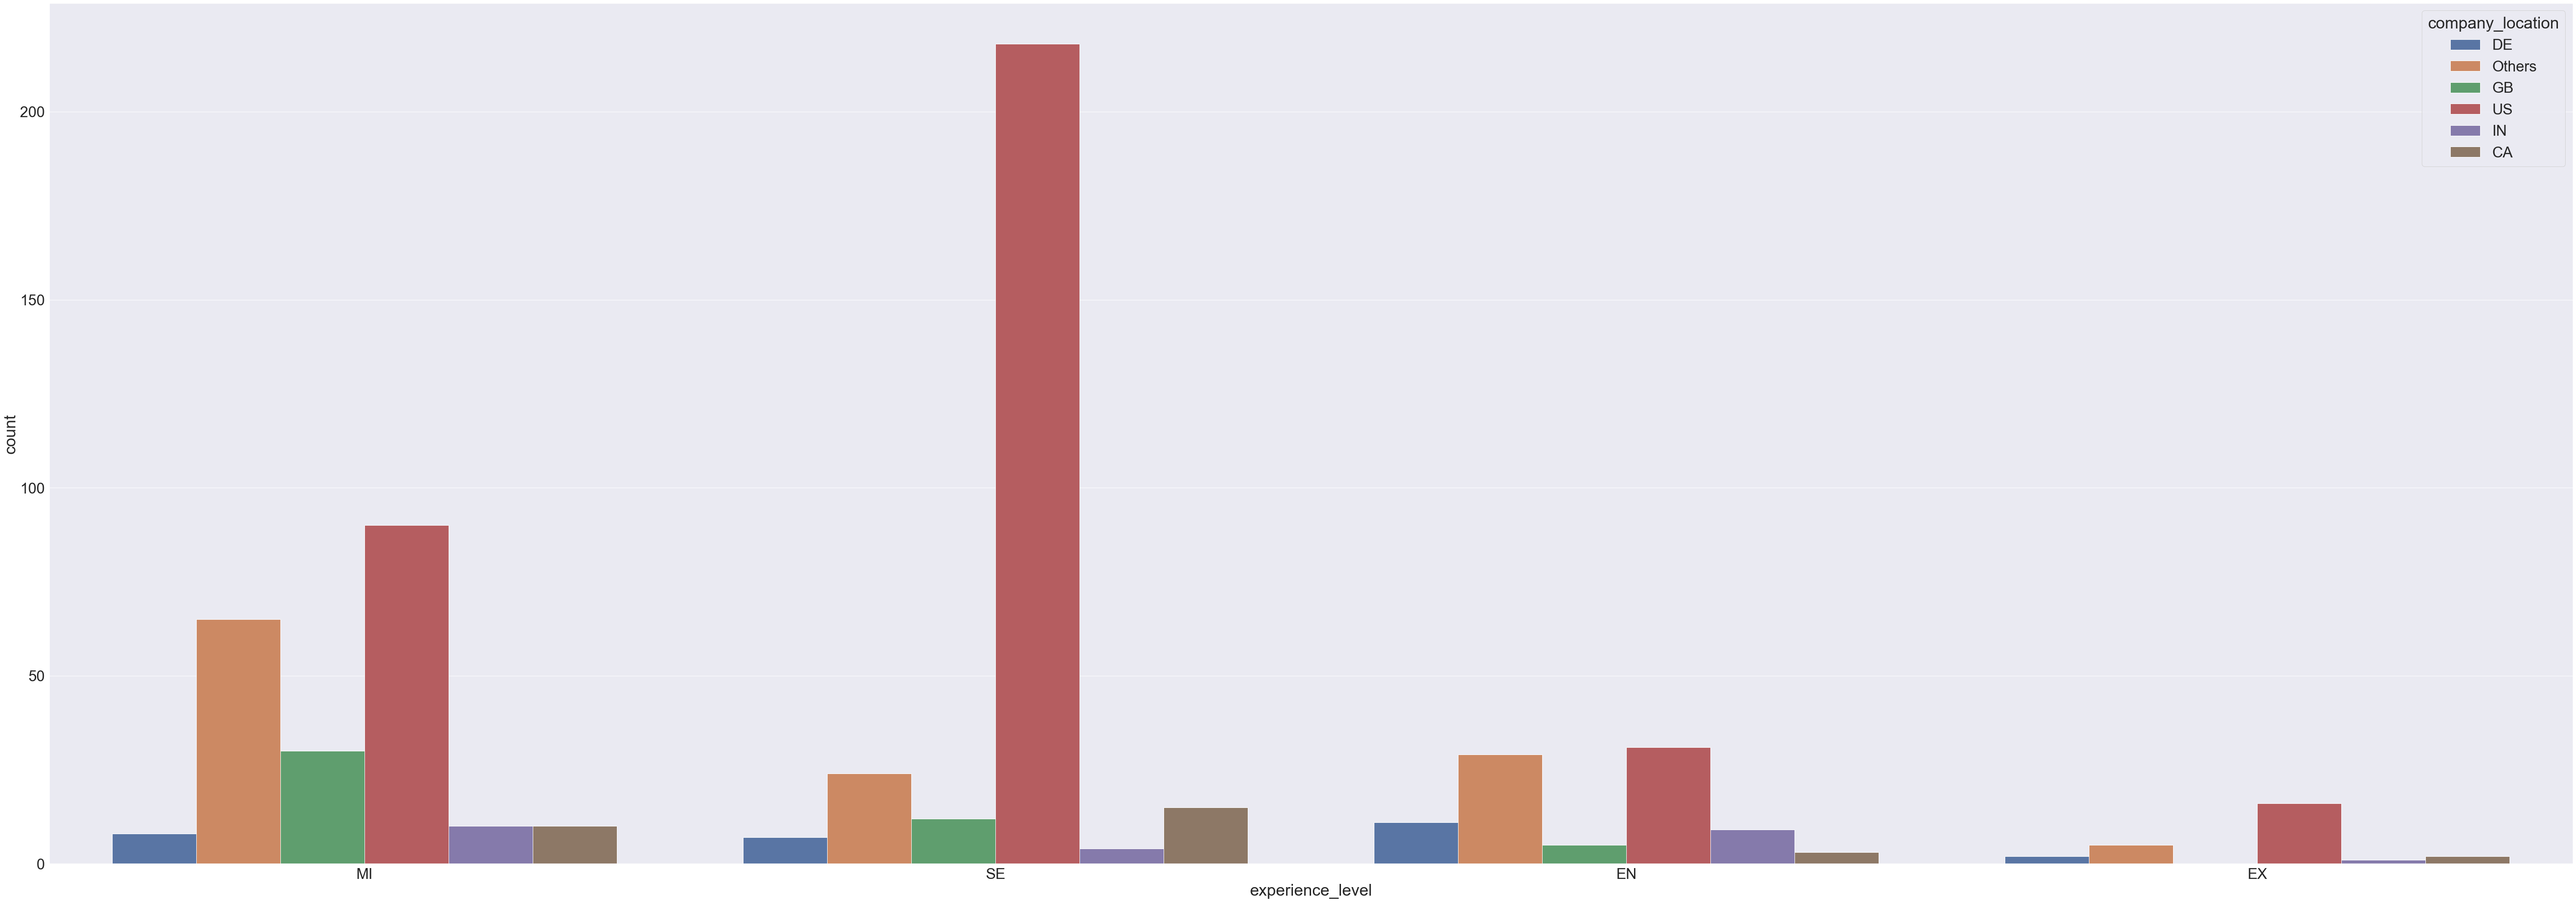

In [81]:
sns.countplot(x = 'experience_level', hue = 'company_location', data = dt)

### MOst of the experiences employees are from the USA.

<AxesSubplot:xlabel='employee_residence', ylabel='salary_in_usd'>

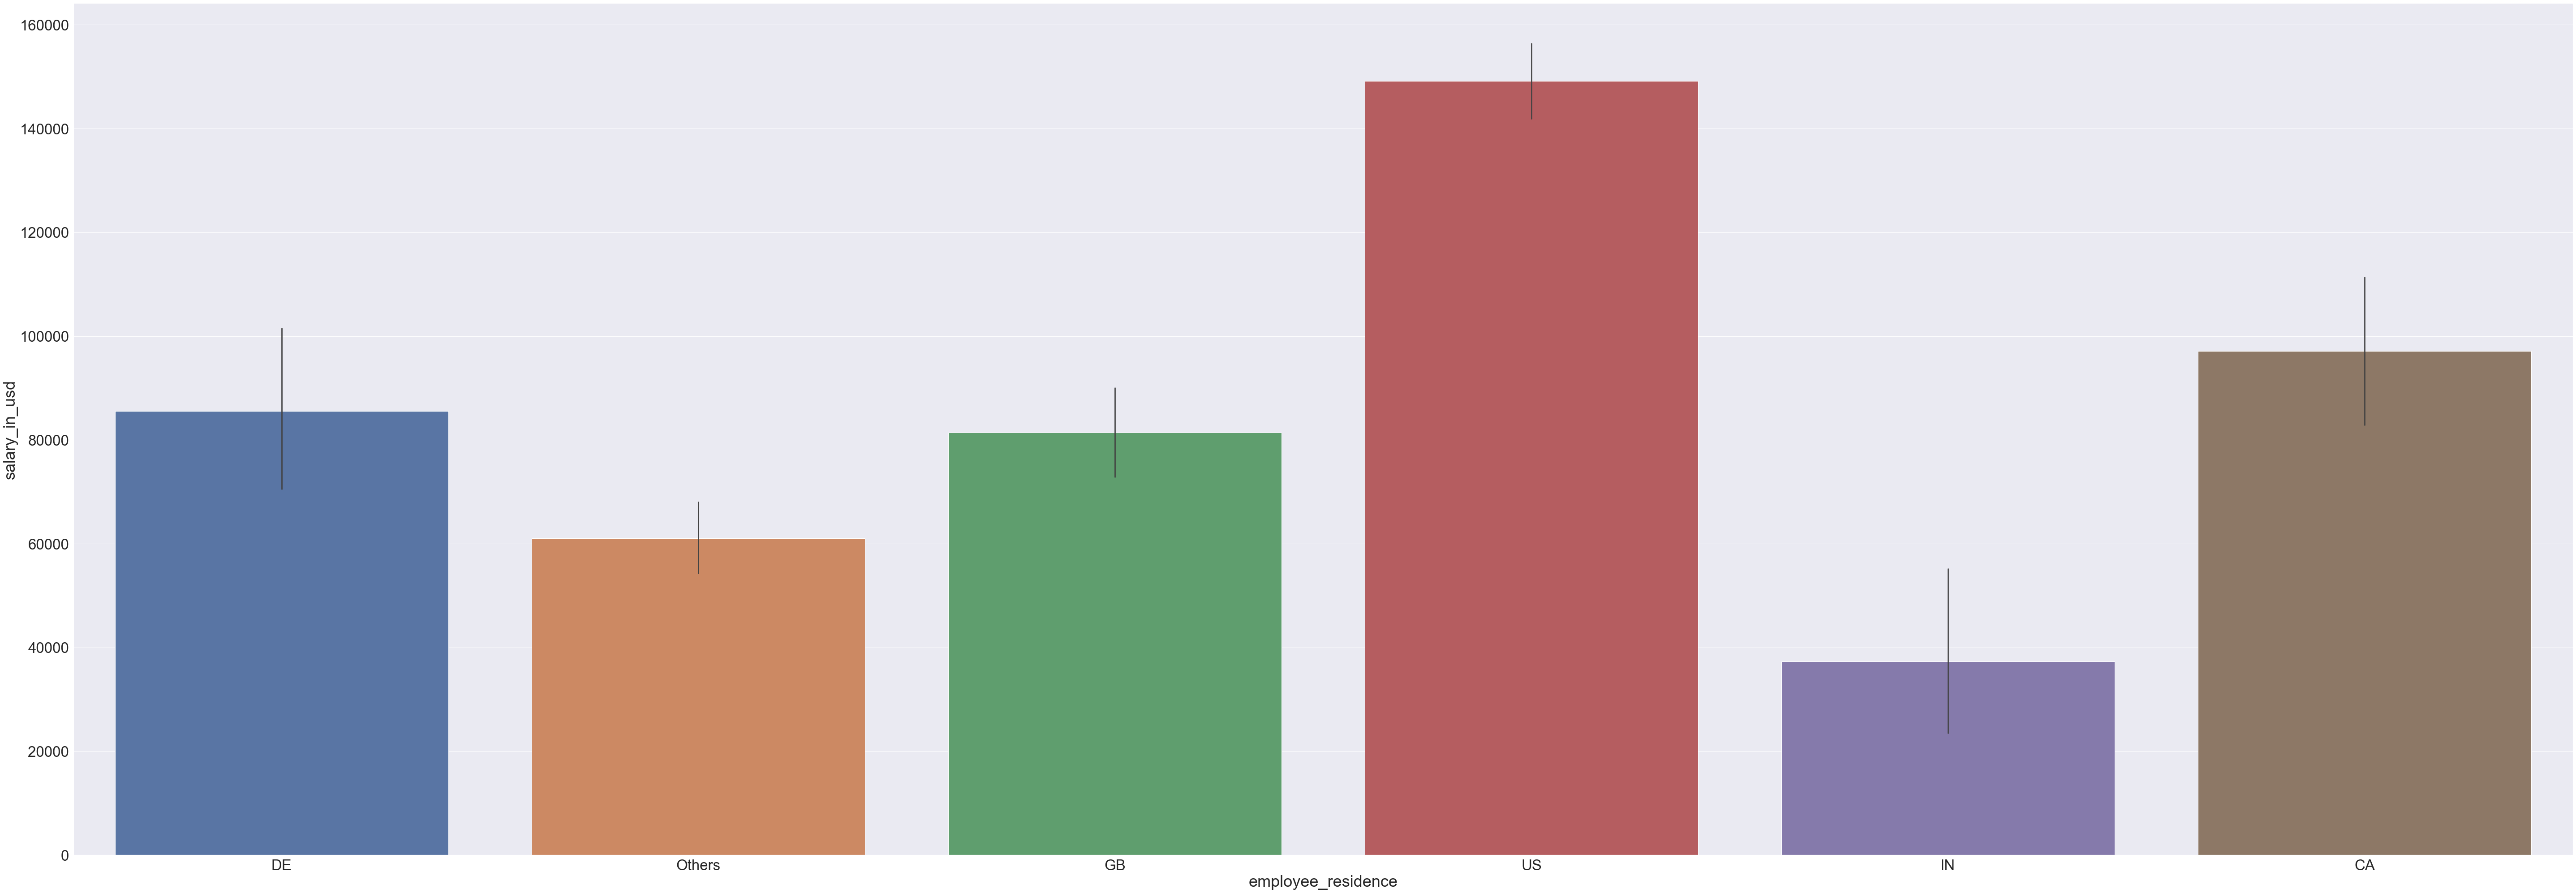

In [82]:
sns.barplot(x = 'employee_residence', y = 'salary_in_usd', data = dt)

#### 1. It can be observed that employess of US are earning more compared to employees of other locations.
#### 2. Employees residing in India are earning comparively less when compared to other employees of other nations however, it makes sense when we take currency conversion into picture.

<AxesSubplot:xlabel='experience_level', ylabel='count'>

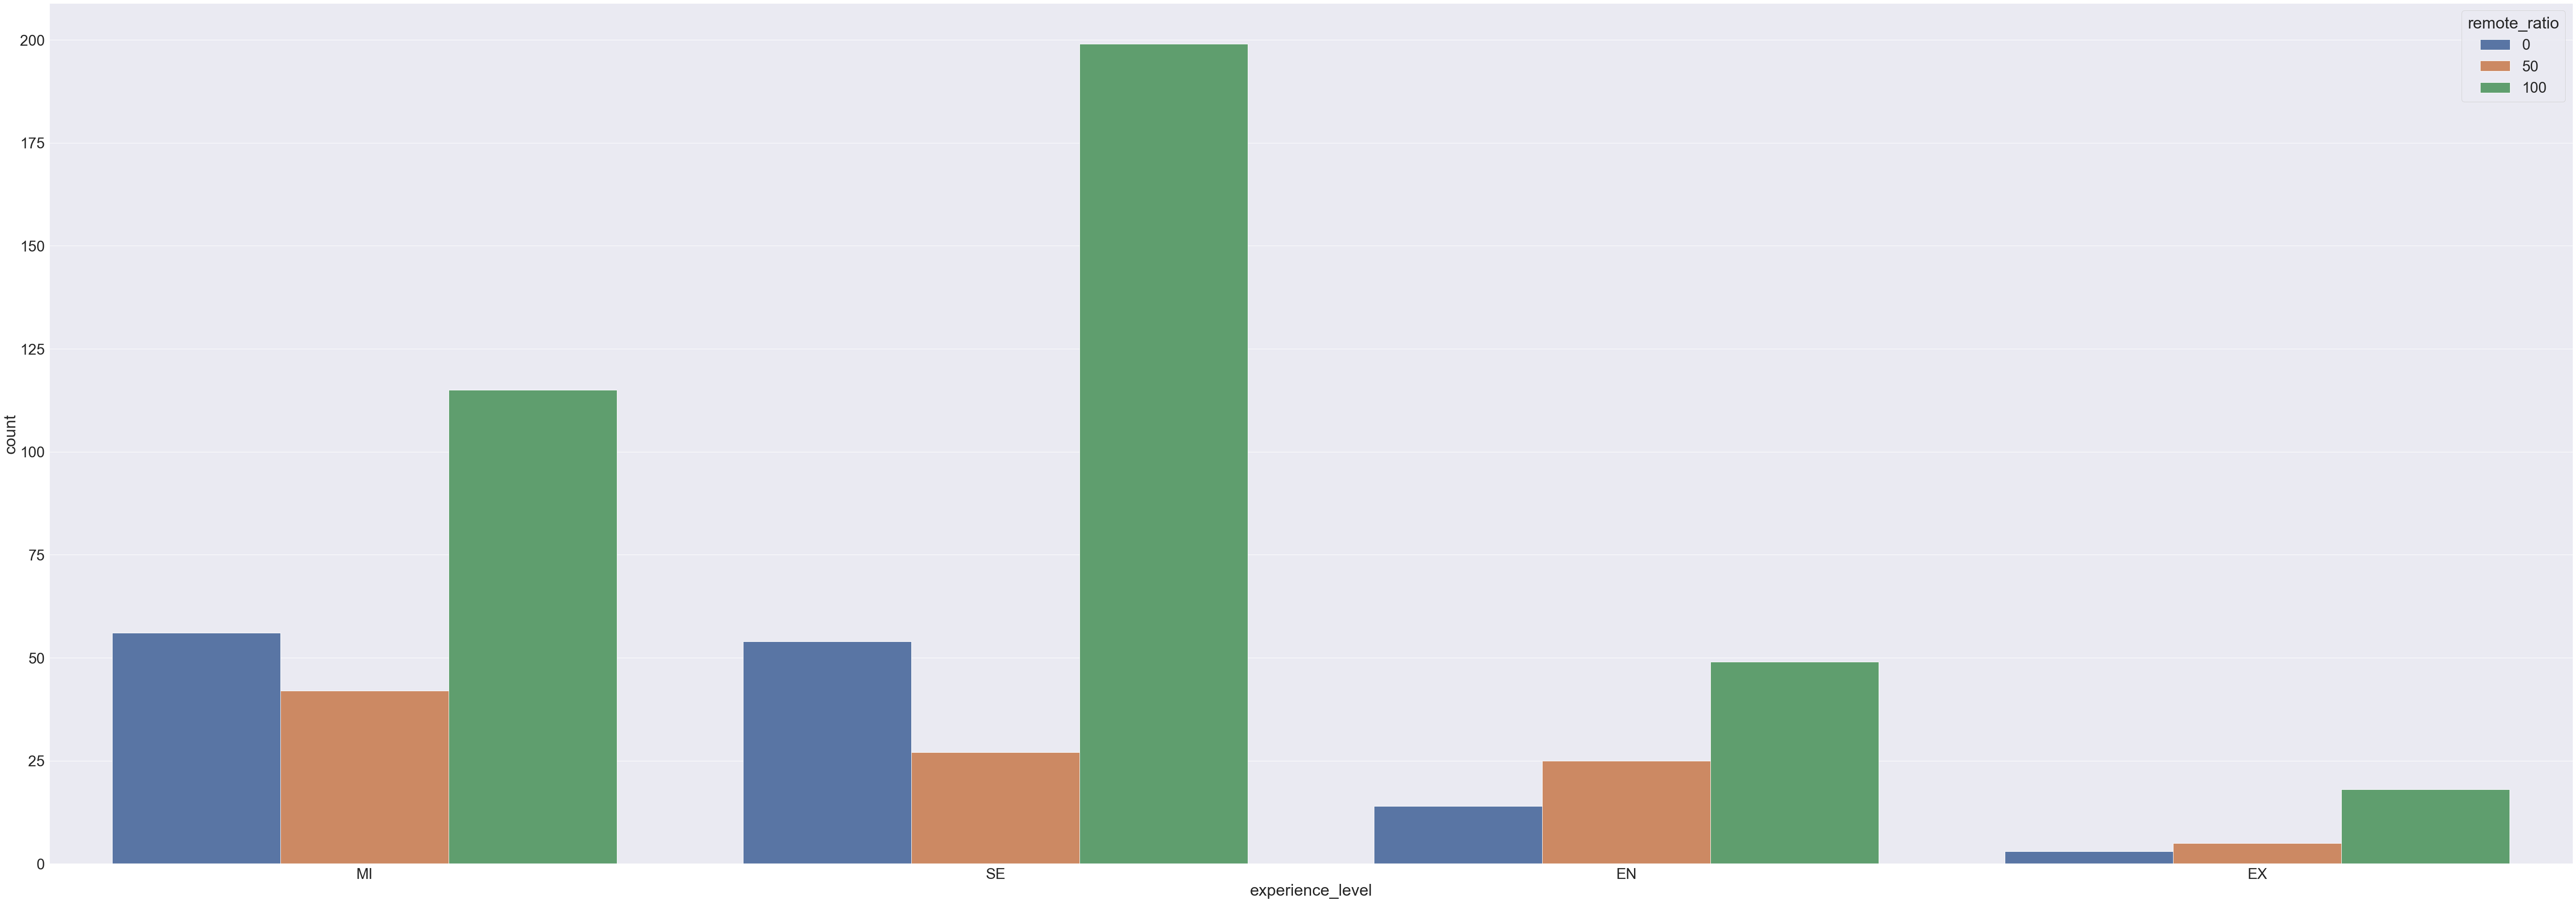

In [83]:
sns.countplot(x = 'experience_level', hue = 'remote_ratio', data = dt)

#### 1. Irrespective of experience level almost everyone is getting 100 % work from home / remote.
#### 2. Less number of employees of Mid and Senior level are being given remote work.

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

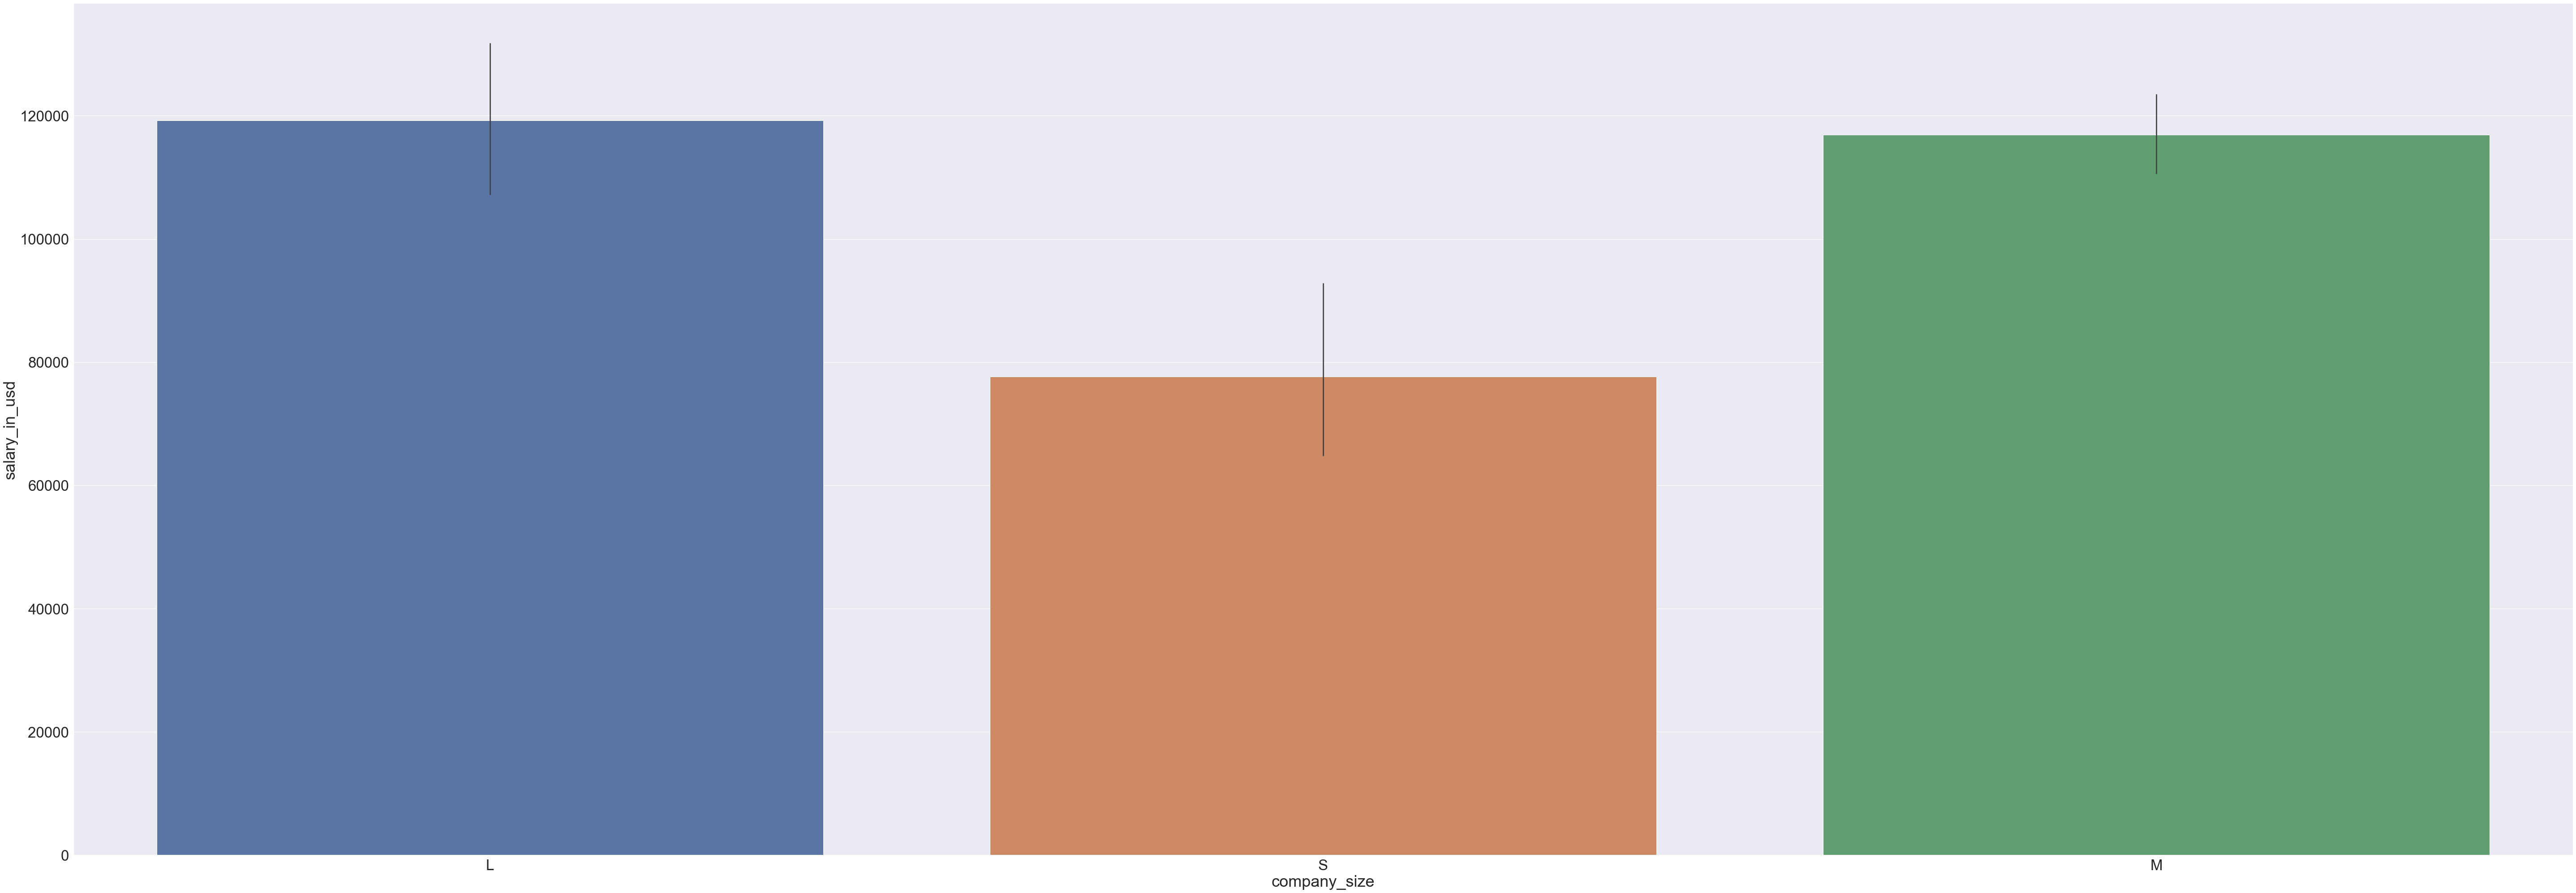

In [84]:
sns.barplot(x = 'company_size', y = 'salary_in_usd', data = dt)

#### Medium and Large size companies are almost giving almost equal pay whereas small size companies are paying very less.